In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
df=pd.read_csv("C:\\Users\\md kaif\\Downloads\\Loan_Data.csv")

In [3]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        if df[i].dtype=="O":
            df[i]=df[i].fillna(df[i].mode()[0])
        else:
            if ((df[i].dtype=="int") or (df[i].dtype=="float")):
                df[i]=df[i].fillna(df[i].mean())
df.isnull().sum()
        

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df.drop(columns=["Loan_ID"],inplace=True)

In [14]:
import missingno as mn

<AxesSubplot: >

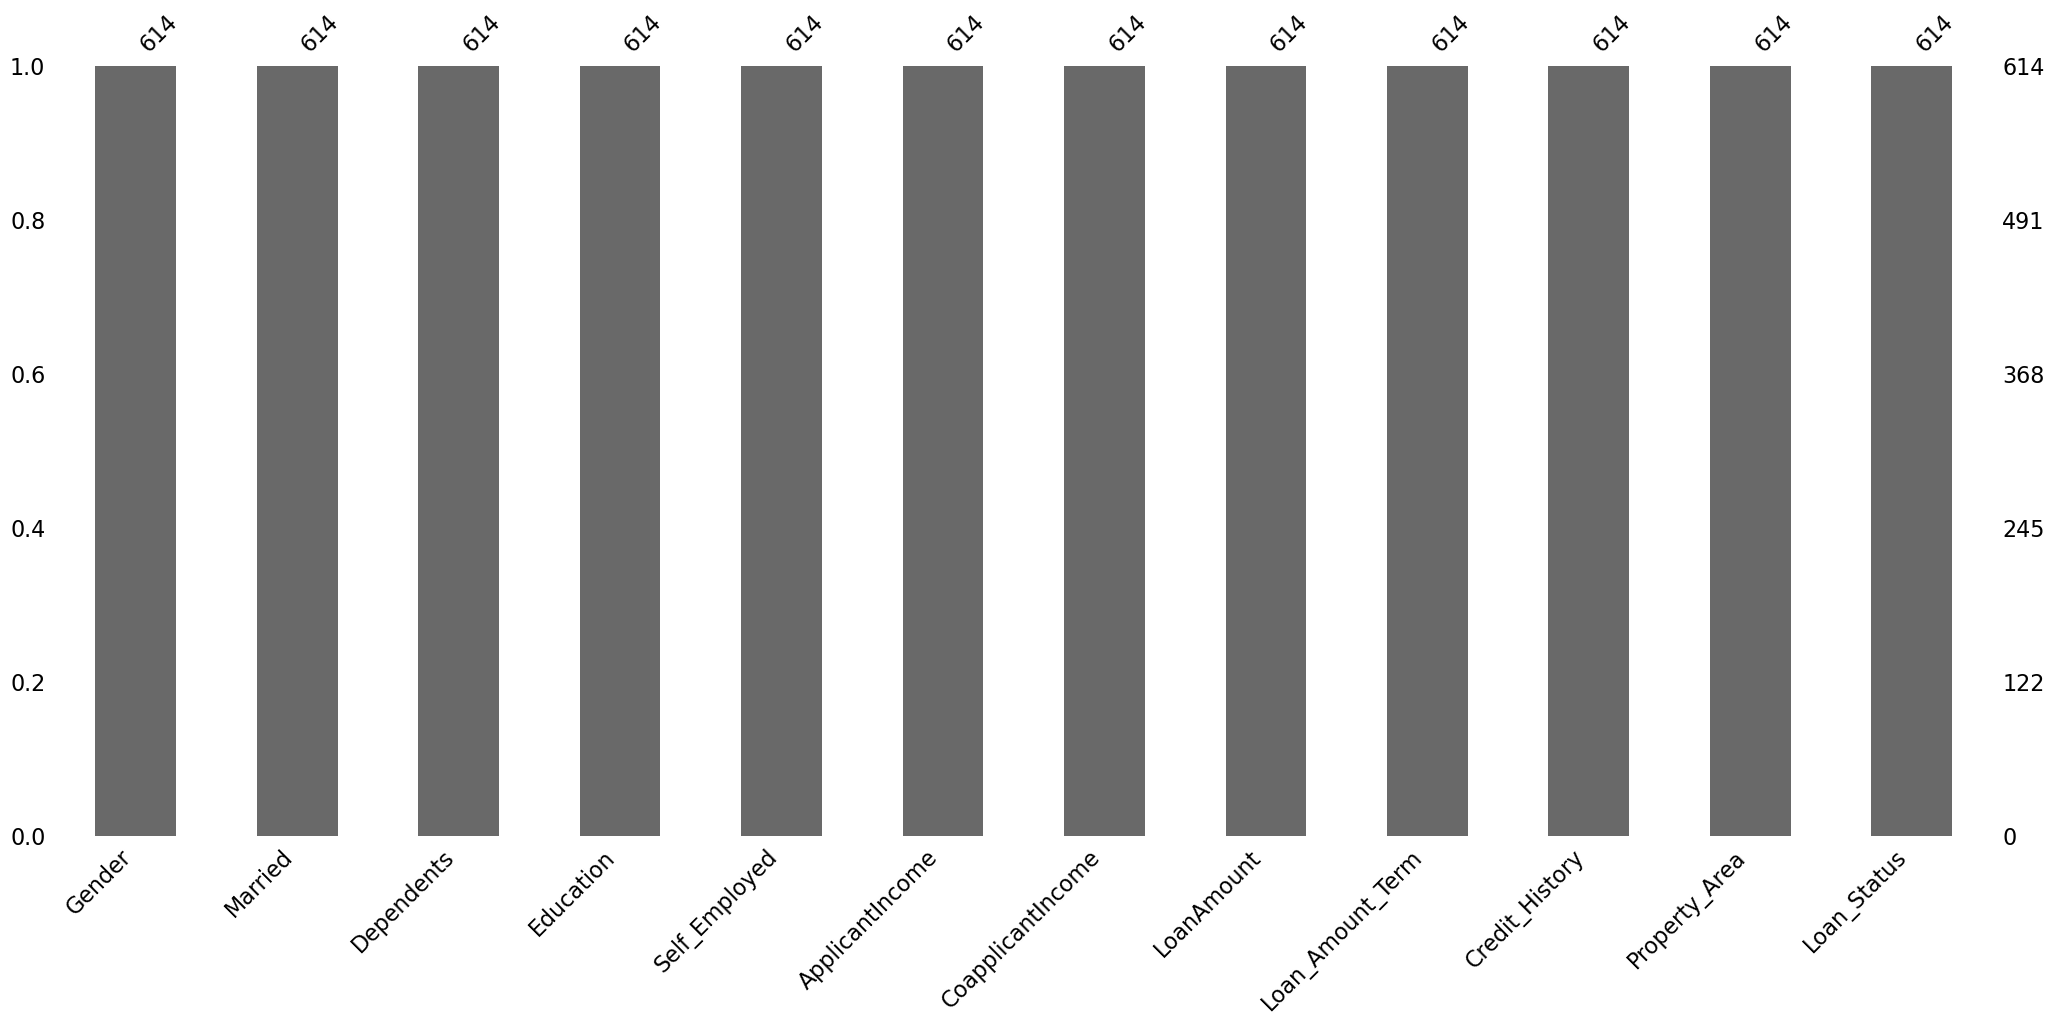

In [15]:
mn.bar(df)

In [16]:
df.select_dtypes(include="object").head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [17]:
for i in df.select_dtypes(include="object").columns:
    print(i,"-----------",df[i].unique())

Gender ----------- ['Male' 'Female']
Married ----------- ['No' 'Yes']
Dependents ----------- ['0' '1' '2' '3+']
Education ----------- ['Graduate' 'Not Graduate']
Self_Employed ----------- ['No' 'Yes']
Property_Area ----------- ['Urban' 'Rural' 'Semiurban']
Loan_Status ----------- ['Y' 'N']


In [19]:
df["Dependents"]=df["Dependents"].replace({"0":0,"1":1,"2":2,"3+":3})

In [20]:
## Seggregating Loan Status In X And Y

In [21]:
x=df.drop(columns=["Loan_Status"])
y=df["Loan_Status"]

In [23]:
df1=pd.get_dummies(columns=[i for i in df.columns if df[i].dtype=="O"],drop_first=True,data=df)

In [24]:
x=df1.copy()

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1200)

In [27]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [29]:
y_pred=abc.predict(x_test)

In [32]:
accuracy_score(y_test,y_pred)

1.0

In [30]:
y_pred_train=abc.predict(x_train)

In [31]:
accuracy_score(y_train,y_pred_train)

1.0

In [33]:
lr=LogisticRegression()

In [34]:
abc_lr=AdaBoostClassifier(base_estimator=lr)
abc_lr.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=LogisticRegression())

In [37]:
y_pred=abc_lr.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred)

0.9675324675324676

In [40]:
grid_param={'n_estimators':[10,20,30,50,100,200,500],
           'learning_rate':[0.0001,0.01,0.001,1.0]
           }

In [41]:

grid_search = GridSearchCV(estimator=AdaBoostClassifier(),
                     param_grid=grid_param,
                    n_jobs =-1,cv=10,scoring="accuracy")


In [42]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.01, 0.001, 1.0],
                         'n_estimators': [10, 20, 30, 50, 100, 200, 500]},
             scoring='accuracy')

In [43]:
grid_search.best_score_


1.0